## Scaling data
- Scaling data is necessary to convert values in a manner which would optimise the ML algorithms which run on them.
- There are two ways we scale data: Normalization and Standardization
- Scaling is useful in situations where we do not want one feature to dominate others.

### Normalization

##### MixMaxScaler

- MixMaxScaler would scale every column's (by default) values down to a range between 0 and 1 using the below formula

`x' = (x - min(x)) / max(x) - min(x)`

- This scales the values based on their propotions to the minimun and maximum values in the dataset.

    x    y
0   1   10
1   2   20
2   3   30
3   4   40
4   5   50
5   6   60
6   7   70
7   8   80
8   9   90
9  10  100
[[0.         0.        ]
 [0.11111111 0.11111111]
 [0.22222222 0.22222222]
 [0.33333333 0.33333333]
 [0.44444444 0.44444444]
 [0.55555556 0.55555556]
 [0.66666667 0.66666667]
 [0.77777778 0.77777778]
 [0.88888889 0.88888889]
 [1.         1.        ]]


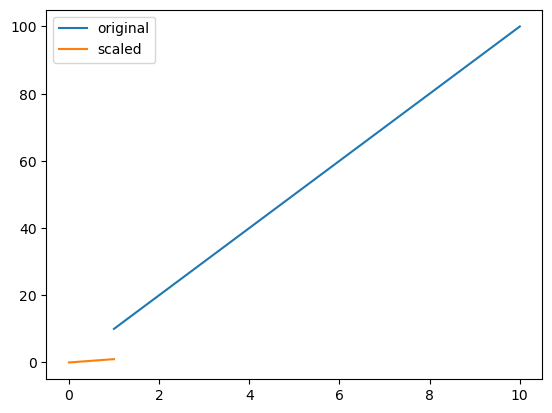

In [4]:
# sklearn minmaxscaler demo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# create a dataframe
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     'y': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})
print(df)

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the dataframe
scaler.fit(df)

# transform the dataframe
scaled_df = scaler.transform(df)
print(scaled_df)

# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_df, columns=['x', 'y'])
df_scaled

# plot the original and scaled data
plt.plot(df['x'], df['y'], label='original')
plt.plot(df_scaled['x'], df_scaled['y'], label='scaled')
plt.legend()
plt.show()

### Standardisation
- Standardisation is done to keep the mean of the data at 0 and keep the standard deviation at 1.
- It is also known as Z-score normalisation.
- The result would be values with the properties of standard normal distribution.

##### Formula:
`z = (x-x') / σ`

`x = the data point to be scaled.`

`x' = the average of the feature`

`σ = standard deviation of the feature`

`z = scaled value`



              x           y
count  10.00000   10.000000
mean    5.50000   55.000000
std     3.02765   30.276504
min     1.00000   10.000000
25%     3.25000   32.500000
50%     5.50000   55.000000
75%     7.75000   77.500000
max    10.00000  100.000000
        x   y
count  10  10
mean    0   0
std     1   1
min    -1  -1
25%     0   0
50%     0   0
75%     0   0
max     1   1


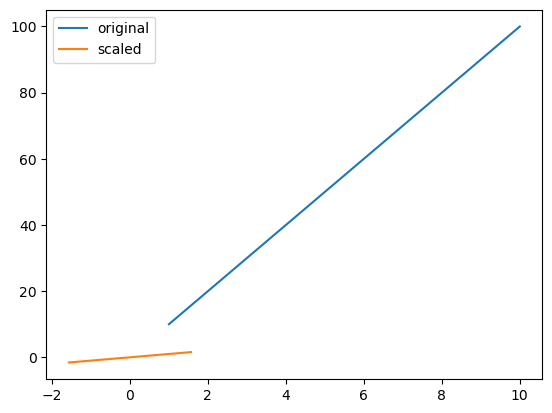

In [27]:
# sklearn standard scaler demo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# create a dataframe
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                        'y': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})

print(df.describe())

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the dataframe
scaled_df = scaler.fit_transform(df)

# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_df, columns=['x', 'y'])

# print the scaled data statistics
print(df_scaled.describe().astype(int).round(2))

# plot the original and scaled data
plt.plot(df['x'], df['y'], label='original')
plt.plot(df_scaled['x'], df_scaled['y'], label='scaled')
plt.legend()
plt.show()

## Outliers
- Outliers are data points that are significantly away from other data points in a given feature.
- So far both methods we have seen are susciptible to being skewed by outliers.

